## Overview
In this notebook, we will be cleaning and performing basic analysis on the NYC 311 data.

## Analysis
* Central tendency (mean, median)
* Dispersion (standard deviation)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/raw/nyc_data.csv')
complaint_types = df['descriptor']

/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_72534/3598901937.py:1: DtypeWarning: Columns (1,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/nyc_data.csv')


We can take a look at the unique requests by making a set of the descriptor column.

This however isn't exact since requests such as 'Loud Music/Party' and 'Noise: Construction Before/After Hours (NM1)' both fall under noise, but the set won't pick that up

In [3]:
print(f"Types of unique requests: {len(set(complaint_types))}")

Types of unique requests: 886


In [4]:
noise_keywords = ['noise', 'noisy', 'loud', 'music', 'pounding', 'sound']
pattern = '|'.join(noise_keywords)
    
complaint_types = complaint_types.astype(str)
noise_rows = complaint_types[complaint_types.str.contains(pattern,case=False,na=False)]
non_noise_rows = complaint_types[~complaint_types.str.contains(pattern,case=False,na=False)]

In [5]:
noise_percentage = len(noise_rows)/len(df) * 100
print(f'Percentage of complaints that are related to noise: {round(noise_percentage,2)}%')

Percentage of complaints that are related to noise: 21.41%


We can do a similar process to see the distribution for other types of complaints:

In [12]:
common_complaints = (non_noise_rows.value_counts() / len(df)) * 100
common_complaints['Noise'] = noise_percentage
common_complaints.sort_values(ascending=False)

descriptor
Noise                                 21.414352
No Access                              4.141737
nan                                    3.497575
Street Light Out                       2.823201
PESTS                                  2.071678
                                        ...    
MICROWAVE                              0.000539
No Idling                              0.000539
Use of Newly Seeded Lawn               0.000539
High Pressure to Take on Loan/Debt     0.000539
Controller Flasher                     0.000539
Name: count, Length: 860, dtype: float64

Now to see what the top 10 most common complaints are

In [14]:
for complaint, percentage in common_complaints.nlargest(10).items():
    print(f"Percentage of complaints for {complaint}: {round(percentage,2)}%")

Percentage of complaints for Noise: 21.41%
Percentage of complaints for No Access: 4.14%
Percentage of complaints for nan: 3.5%
Percentage of complaints for Street Light Out: 2.82%
Percentage of complaints for PESTS: 2.07%
Percentage of complaints for Posted Parking Sign Violation: 1.75%
Percentage of complaints for Pothole: 1.5%
Percentage of complaints for Partial Access: 1.49%
Percentage of complaints for Blocked Hydrant: 1.49%
Percentage of complaints for With License Plate: 1.43%


To visualize this spread:

In [9]:
import matplotlib.pyplot as plt

In [19]:
# Organize and truncate data to show top 5 types
n = 10
top_n_types = common_complaints.nlargest(n)
other = common_complaints[~common_complaints.index.isin(top_n_types.index)].sum()
top_n_types['Other'] = other

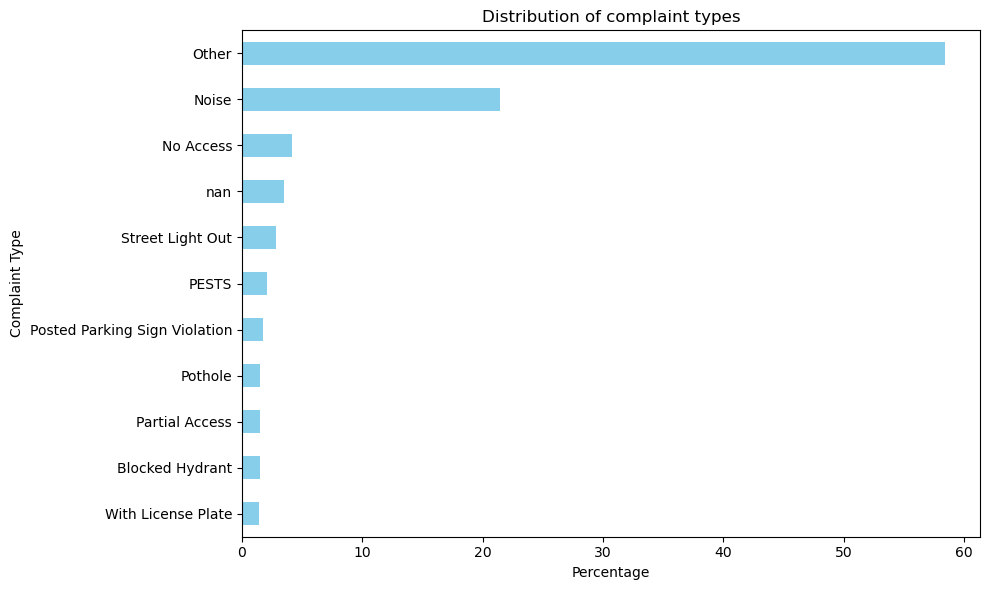

In [21]:
plt.figure(figsize=(10,6))
top_n_types.sort_values().plot.barh(color='skyblue')
plt.title("Distribution of complaint types")
plt.ylabel("Complaint Type")
plt.xlabel("Percentage")
plt.tight_layout()
plt.show()